In [1]:
# importing necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#  Dataset link : https://drive.google.com/drive/folders/1yFdxmfq1qldBYQzJMmKZb88O9fb4Rvg-?usp=drive_link

In [3]:
# Loading dataset

train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")
oil = pd.read_csv("oil.csv")
holidays_events = pd.read_csv("holidays_events.csv")
sample_submission = pd.read_csv("sample_submission.csv")
stores = pd.read_csv("stores.csv")
transactions = pd.read_csv("transactions.csv")

In [4]:
# displaying train dataset
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [5]:
# displaying test dataset
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [6]:
# displaying oil dataset
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [7]:
# displaying holidays_event dataset
holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [8]:
# displaying sample_submission dataset
sample_submission.head()

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0


In [9]:
# displaying stores dataset
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [10]:
# displaying transactions dataset
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


## Analysing all datset

### train dataset

In [11]:
# Analysing train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [12]:
# checking for null value
train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

### test dataset

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [14]:
test.isnull().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

### holidays_events dataset

In [15]:
holidays_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [16]:
holidays_events.type.unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

In [17]:
holidays_events.isnull().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

### sample_submission datset

In [18]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28512 non-null  int64  
 1   sales   28512 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 445.6 KB


In [19]:
sample_submission.isnull().sum()

id       0
sales    0
dtype: int64

### stores dataset

In [20]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [21]:
stores.isna().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

### transactions dataset

In [22]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [23]:
transactions.isnull().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

### Oil Dataset

In [24]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [25]:
oil.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

# Part 1: Data Processing and Feature Engineering

## 1. Data Cleaning

In [26]:
# Convert date columns to datetime format

train["date"] = pd.to_datetime(train["date"])
test["date"] = pd.to_datetime(test["date"])
oil["date"] = pd.to_datetime(oil["date"])
holidays_events["date"] = pd.to_datetime(holidays_events["date"])
transactions["date"] = pd.to_datetime(transactions["date"])

In [27]:
# Handle missing values in oil prices by filling gaps with interpolation.

oil["dcoilwtico"].fillna(method='bfill', inplace=True)
oil["dcoilwtico"].interpolate(method='linear', inplace=True)

# In the context of handling missing values in oil prices, instead of simply filling missing values with a fixed value (like mean or median),
# interpolation uses mathematical techniques to predict values between known points(Useful for time-series data).
# Used linear interpolation because Oil prices tend to have gradual trends rather than highly fluctuating, oscillatory patterns.

In [28]:
# Merge data from stores.csv, oil.csv, and holidays_events.csv into the main dataset.

train = train.merge(stores, on="store_nbr", how="inner").rename(columns={'type': 'stores_type'})
train = train.merge(oil, on="date", how="inner")
train = train.merge(holidays_events, on="date", how="inner").rename(columns={'type': 'holidays_type'})

test = test.merge(stores, on="store_nbr", how="inner").rename(columns={'type': 'stores_type'})
test = test.merge(oil, on="date", how="inner")
test = test.merge(holidays_events, on="date", how="inner").rename(columns={'type': 'holidays_type'})

In [29]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,stores_type,cluster,dcoilwtico,holidays_type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False


In [30]:
test.head()

,id,date,store_nbr,family,onpromotion,city,state,stores_type,cluster,dcoilwtico,holidays_type,locale,locale_name,description,transferred
0,3015144,2017-08-24,1,AUTOMOTIVE,0,Quito,Pichincha,D,13,47.24,Holiday,Local,Ambato,Fundacion de Ambato,False
1,3015145,2017-08-24,1,BABY CARE,0,Quito,Pichincha,D,13,47.24,Holiday,Local,Ambato,Fundacion de Ambato,False
2,3015146,2017-08-24,1,BEAUTY,0,Quito,Pichincha,D,13,47.24,Holiday,Local,Ambato,Fundacion de Ambato,False
3,3015147,2017-08-24,1,BEVERAGES,26,Quito,Pichincha,D,13,47.24,Holiday,Local,Ambato,Fundacion de Ambato,False
4,3015148,2017-08-24,1,BOOKS,0,Quito,Pichincha,D,13,47.24,Holiday,Local,Ambato,Fundacion de Ambato,False


## 2. Feature Engineering

##### Time-based features:

In [31]:
#  Extract day, week, month, year, and day of the week

train['day'] = train['date'].dt.day      
train['week'] = train['date'].dt.isocalendar().week     
train['month'] = train['date'].dt.month    
train['year'] = train['date'].dt.year     
train['day_of_week'] = train['date'].dt.dayofweek   
train['is_weekend'] = train['day_of_week'].apply(lambda x: 1 if x >= 5 else 0) 

test['day'] = test['date'].dt.day  
test['week'] = test['date'].dt.isocalendar().week
test['month'] = test['date'].dt.month
test['year'] = test['date'].dt.year
test['day_of_week'] = test['date'].dt.dayofweek
test['is_weekend'] = test['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)


    # 'day' : gives information of day
    # 'week' : gives information of week
    # 'month' : gives information of month
    # 'year' : gives information of year
    # 'day_of_week' : gives information of dayofweek
    # 'is_weekend' : gives information whether its weekend or not

    # Why?- These features help capture seasonal sales trends i.e how sales is affected by day, week, month, year, and day of the week.

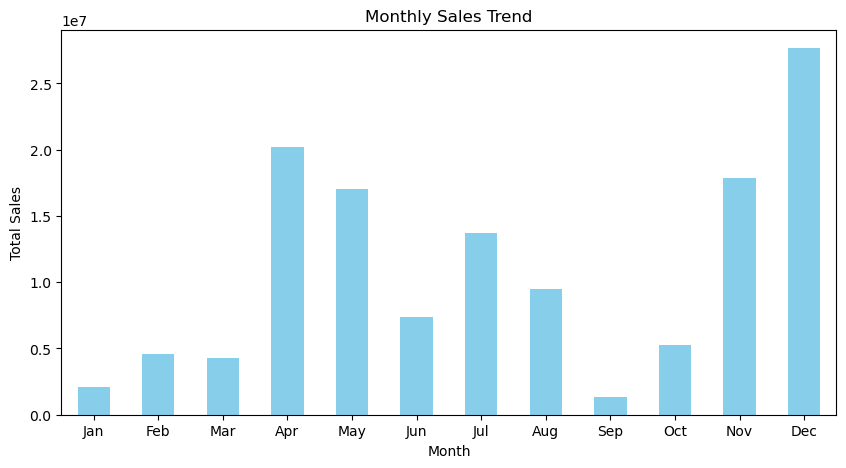

In [32]:
# Identify seasonal trends
monthly_sales = train.groupby('month')['sales'].sum()
plt.figure(figsize=(10,5))
monthly_sales.plot(kind='bar', color='skyblue')
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend")
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.show()

    # Ploting seasonal trends (sales on the basis of each month)

##### Event-based Features:

In [33]:
# Create binary flags for holidays, promotions, and economic events

train['is_holiday'] = train['holidays_type'].apply(lambda x: 1 if x in ['Holiday', 'Event', 'Additional', 'Bridge'] else 0) 
test['is_holiday'] = test['holidays_type'].apply(lambda x: 1 if x in ['Holiday', 'Event', 'Additional', 'Bridge'] else 0)

train['is_economic_event'] = train['holidays_type'].apply(lambda x: 1 if x in ['Transfer', 'Work Day'] else 0)
test['is_economic_event'] = test['holidays_type'].apply(lambda x: 1 if x in ['Transfer', 'Work Day'] else 0)

train['is_promotion'] = train['holidays_type'].apply(lambda x: 1 if x == 'Promotion' else 0)
test['is_promotion'] = test['holidays_type'].apply(lambda x: 1 if x == 'Promotion' else 0)

    # 'is_holiday' : Flags holidays and events.
    # 'is_economic_event' : Flags government transfers/workdays.
    # 'is_promotion' : Flags promotional event.

    # Why?- It help in detecting spikes in sales due to external events.

In [34]:
#  Identify if a day is a government payday (15th and last day of the month)

train['is_payday'] = ((train['day'] == 15) | (train['day'] == train['date'].dt.days_in_month)).astype(int)
test['is_payday'] = ((test['day'] == 15) | (test['day'] == test['date'].dt.days_in_month)).astype(int)

    # 'is_payday' : Tell if a day is a government payday (15th and last day of the month)

    # Why? - Many customers receive salaries on the 15th and last day of the month, leading to increased sales as people spend more when they have money.

In [35]:
# Consider earthquake impact (April 16, 2016) as a separate feature.

train['is_earthquake'] = (train['date'] == '2016-04-16').astype(int)
test['is_earthquake'] = (test['date'] == '2016-04-16').astype(int)

    # 'is_earthquake' : Day on which earthquake occured

    # Why?- Natural disasters like earthquakes can disrupt sales due to store closures, supply chain issues, and customer behavior changes. Thus helps models understand sudden drops in sales and adjust future forecasts accordingly.

##### Rolling Statistics:

In [36]:
# Compute moving averages and rolling standard deviations for past sales.

train['rolling_avg_7'] = train.groupby(['store_nbr', 'family'])['sales'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())
train['rolling_std_7'] = train.groupby(['store_nbr', 'family'])['sales'].transform(lambda x: x.rolling(window=7, min_periods=1).std())

# Handling missing value created during rolling_std_7
train['rolling_std_7'] = train['rolling_std_7'].fillna(0)


    # 'rolling_avg_7' : moving avg of sales of previous week (Captures short-term trends).
    # 'rolling_std_7' : moving std of sales of previous week Measures fluctuations in sales.

    # Why?- Sales fluctuate daily, and short-term trends provide valuable insights.

In [37]:
#  Include lagged features (e.g., sales from the previous week, previous month)

# Create a shifted dataframe for lag_7
lag_7_df = train[['date', 'store_nbr', 'family', 'sales']].copy()
lag_7_df['date'] = lag_7_df['date'] - pd.Timedelta(days=7)  # Shift date backward by 7 days
lag_7_df.rename(columns={'sales': 'lag_7'}, inplace=True)

# Create a shifted dataframe for lag_1m (previous month)
lag_1m_df = train[['date', 'store_nbr', 'family', 'sales']].copy()
lag_1m_df['date'] = lag_1m_df['date'] - pd.DateOffset(months=1)  # Shift date backward by 1 month
lag_1m_df.rename(columns={'sales': 'lag_1m'}, inplace=True)

# Merge lag_7 and lag_1m into train
train = train.merge(lag_7_df, on=['date', 'store_nbr', 'family'], how='left')
train = train.merge(lag_1m_df, on=['date', 'store_nbr', 'family'], how='left')


# NaN values appear because some dates in the dataset don’t have corresponding past sales values thus handling them.
train[['lag_7', 'lag_1m']] = train[['lag_7', 'lag_1m']].fillna(0)


    # 'lag_7' : Previous week sales
    # 'lag_1m' : Previous month sales

    # Why?- Past sales trends strongly influence future demand.These help capture sales patterns over time.

#####  Store-Specific Aggregations:

In [38]:
# Compute average sales per store type
avg_sales_per_store_type = train.groupby('stores_type')['sales'].mean()
print(avg_sales_per_store_type)

stores_type
A    719.579807
B    344.145346
C    202.868670
D    366.217010
E    286.866142
Name: sales, dtype: float64


In [39]:
# Get the top 1 product family per cluster

## 3. Exploratory Data Analysis (EDA)

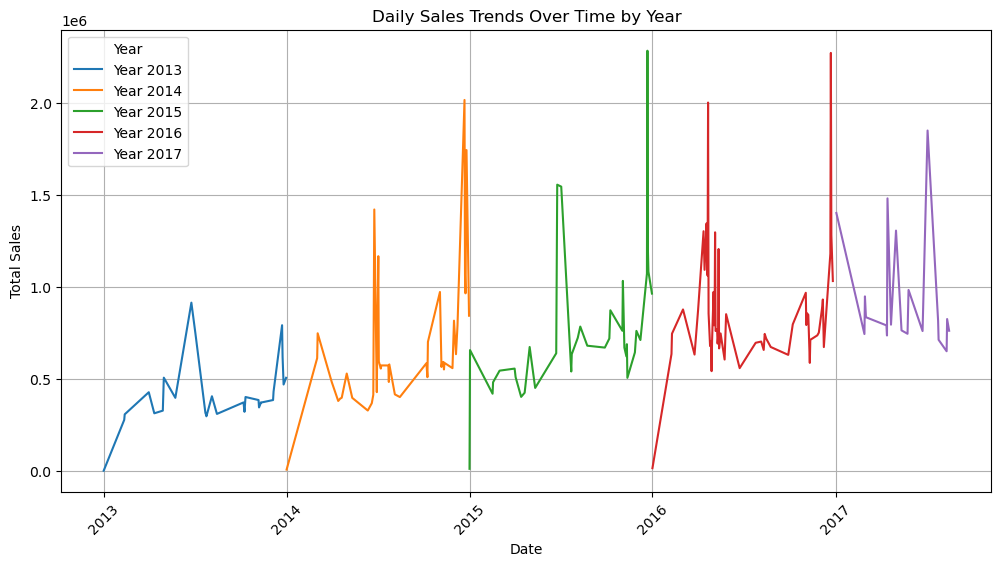

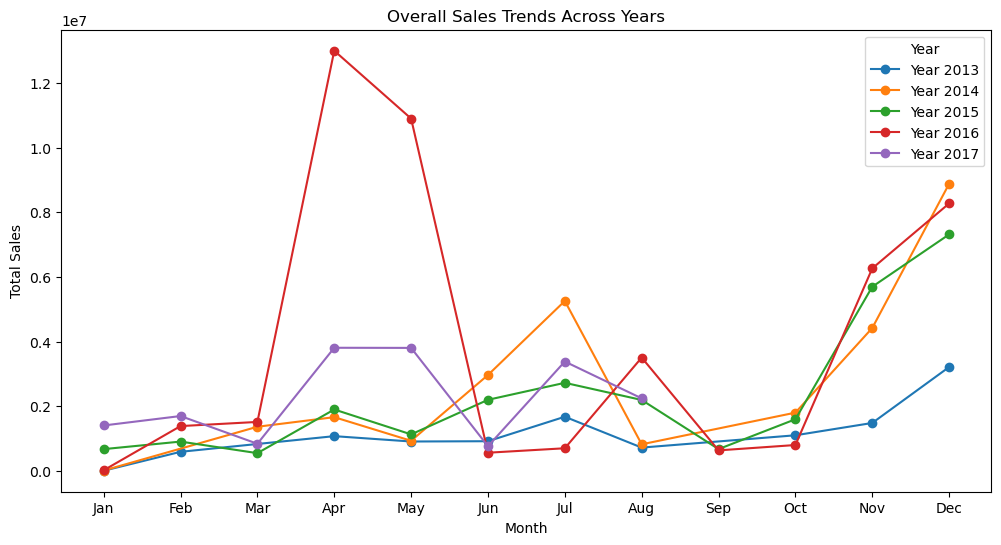

In [40]:
# Visualize sales trends over time.

# combined graph for each year
plt.figure(figsize=(12,6))
for year in train['year'].unique():
    yearly_sales = train[train['year'] == year].groupby('date')['sales'].sum()
    plt.plot(yearly_sales.index, yearly_sales.values, linestyle='-', label=f'Year {year}')

plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Daily Sales Trends Over Time by Year")
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.grid()
plt.show()

# Separate graphs for each year
unique_years = train['year'].unique()
plt.figure(figsize=(12,6))
for year in unique_years:
    yearly_sales = train[train['year'] == year].groupby('month')['sales'].sum()
    plt.plot(yearly_sales.index, yearly_sales.values, marker='o', linestyle='-', label=f'Year {year}')

plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Overall Sales Trends Across Years")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.show()

    # Sales has increased compared to previous year

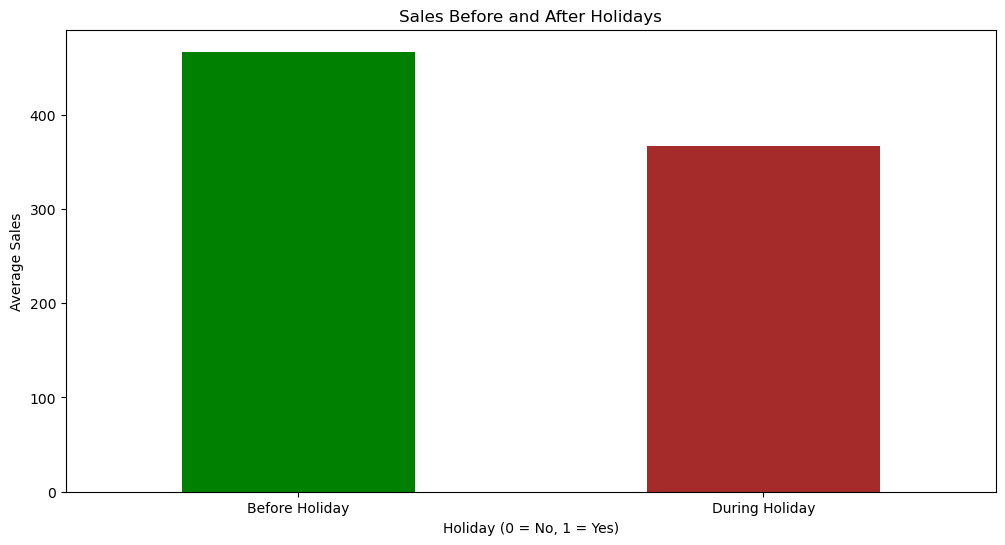

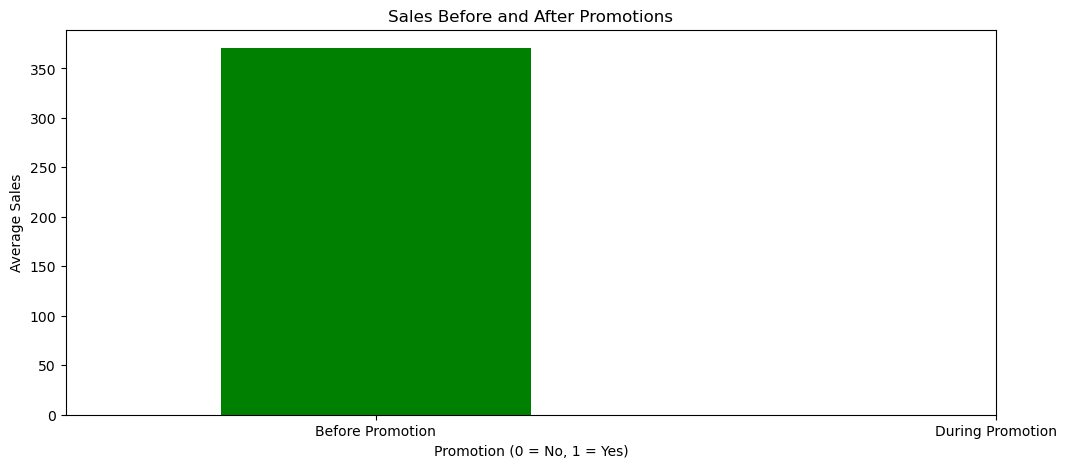

In [41]:
# Analyze sales before and after holidays and promotions

# for holiday
plt.figure(figsize=(12,6))
train.groupby('is_holiday')['sales'].mean().plot(kind='bar', color=['green', 'brown'])
plt.xlabel("Holiday (0 = No, 1 = Yes)")
plt.ylabel("Average Sales")
plt.title("Sales Before and After Holidays")
plt.xticks(ticks=[0, 1], labels=['Before Holiday', 'During Holiday'], rotation=0)
plt.show()

# for promotions
plt.figure(figsize=(12,5))
train.groupby('is_promotion')['sales'].mean().plot(kind='bar', color=['green', 'brown'])
plt.xlabel("Promotion (0 = No, 1 = Yes)")
plt.ylabel("Average Sales")
plt.title("Sales Before and After Promotions")
plt.xticks(ticks=[0, 1], labels=['Before Promotion', 'During Promotion'], rotation=0)
plt.show()

    # Insight: Avg sales increase in holidays

In [42]:
# Check correlations between oil prices and sales trends

train[['sales', 'dcoilwtico']].corr()

    # Insight: Sales and Oil Prices('dcoilwtico') are negatively correlated i.e sales increase when there is decrease in oil price, vice-versa.

train.isnull().sum()

id                   0
date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
city                 0
state                0
stores_type          0
cluster              0
dcoilwtico           0
holidays_type        0
locale               0
locale_name          0
description          0
transferred          0
day                  0
week                 0
month                0
year                 0
day_of_week          0
is_weekend           0
is_holiday           0
is_economic_event    0
is_promotion         0
is_payday            0
is_earthquake        0
rolling_avg_7        0
rolling_std_7        0
lag_7                0
lag_1m               0
dtype: int64

#  Part 2: Model Selection, Forecasting, and Evaluation

In [43]:
# imports for model
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# imports for evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

## 1. Model Training

##### Baseline Model (Naïve Forecasting)

In [44]:
# 1. Baseline Model (Naïve Forecasting)

train['naive_forecast'] = train['sales'].shift(1).fillna(method='bfill')

##### ARIMA Model

In [45]:
# Arima Model 

# # Auto-tune ARIMA hyperparameters (use it for good accuracy.I am not using it due to lack of system processor & RAM)
# auto_arima_model = auto_arima(train['sales'], seasonal=False, stepwise=True, suppress_warnings=True)
# best_order = auto_arima_model.order
# print(f"Optimal ARIMA order: {best_order}")

model = ARIMA(train['sales'], order=(1, 1, 1))
model_fit = model.fit()
train['arima_forecast'] = model_fit.predict(start=0, end=len(train)-1, dynamic=False)

# Forecast next 15 days
future_dates_arima = pd.date_range(start=train['date'].max() + pd.Timedelta(days=1), periods=15)
future_forecast_arima = model_fit.forecast(steps=15)
future_df_arima = pd.DataFrame({'date': future_dates_arima, 'sales_forecast_arima': future_forecast_arima})

print("\nFuture Sales Predictions using ARIMA for Next 15 Days:")
print(future_df_arima)


Future Sales Predictions using ARIMA for Next 15 Days:
             date  sales_forecast_arima
358182 2017-08-16            475.427688
358183 2017-08-17            504.962114
358184 2017-08-18            506.860742
358185 2017-08-19            506.982796
358186 2017-08-20            506.990642
358187 2017-08-21            506.991146
358188 2017-08-22            506.991179
358189 2017-08-23            506.991181
358190 2017-08-24            506.991181
358191 2017-08-25            506.991181
358192 2017-08-26            506.991181
358193 2017-08-27            506.991181
358194 2017-08-28            506.991181
358195 2017-08-29            506.991181
358196 2017-08-30            506.991181


##### Random Forest Regressor

In [46]:
# Extracting Features and target for Random Forest Regressor & XGBoost Model

features = ['day', 'week', 'month', 'year', 'day_of_week', 'is_weekend', 'is_holiday', 'is_economic_event',
            'is_promotion', 'is_payday', 'is_earthquake', 'rolling_avg_7', 'rolling_std_7', 'lag_7', 'lag_1m', 'dcoilwtico']

X = train[features]
y = train['sales']

In [47]:
# 3. Random Forest Regressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)
train['rf_forecast'] = rf_model.predict(X)

# # predicting for test data
# test['rf_forecast'] = rf_model.predict(test[features])

##### XGBoost Model

In [48]:
## 4. XGBoost Model

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X, y)
train['xgb_forecast'] = xgb_model.predict(X)

# # predicting for test data
# test['rf_forecast'] = xgb_model.predict(test[features])

## 2. Model Evaluation

In [49]:
# Function for Evaluation Metrics
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{model_name} Results:")
    print(f"RMSE: {rmse}")
    print(f"MAPE: {mape}")
    print(f"R2 Score: {r2}")
    return rmse, mape, r2

In [50]:
## Model Comparison

models = ['Naïve', 'ARIMA', 'Random Forest', 'XGBoost']
rmse_scores, mape_scores, r2_scores = [], [], []

for model_name, forecast in zip(models, ['naive_forecast', 'arima_forecast', 'rf_forecast', 'xgb_forecast']):
    rmse, mape, r2 = evaluate_model(train['sales'], train[forecast], model_name)
    rmse_scores.append(rmse)
    mape_scores.append(mape)
    r2_scores.append(r2)

results_df = pd.DataFrame({'Model': models, 'RMSE': rmse_scores, 'MAPE': mape_scores, 'R2 Score': r2_scores})
print("\nModel Comparison:")
print(results_df.sort_values(by='RMSE'))


Naïve Results:
RMSE: 1600.538504379737
MAPE: 3.9599182992698656e+17
R2 Score: -0.8000326461544409

ARIMA Results:
RMSE: 1175.1679492912765
MAPE: 3.702585984610784e+17
R2 Score: 0.029606217308891902

Random Forest Results:
RMSE: 165.91945823900198
MAPE: 1698151244445788.2
R2 Score: 0.9806561564636245

XGBoost Results:
RMSE: 299.0876837685772
MAPE: 1.301675340300203e+16
R2 Score: 0.9371442246959754

Model Comparison:
           Model         RMSE          MAPE  R2 Score
2  Random Forest   165.919458  1.698151e+15  0.980656
3        XGBoost   299.087684  1.301675e+16  0.937144
1          ARIMA  1175.167949  3.702586e+17  0.029606
0          Naïve  1600.538504  3.959918e+17 -0.800033


#### Forecasting next 15 days sales.

In [51]:
# Forecasting next 15 Days sale using best model.

future_dates = pd.date_range(start=train['date'].max() + pd.Timedelta(days=1), periods=15)
future_df = pd.DataFrame({'date': future_dates})

future_features = train[features].iloc[-15:]
future_df['sales_forecast'] = rf_model.predict(future_features)

print("\nFuture Sales Predictions for Next 15 Days:")
print(future_df[['date', 'sales_forecast']])


Future Sales Predictions for Next 15 Days:
         date  sales_forecast
0  2017-08-16      386.697920
1  2017-08-17       13.400000
2  2017-08-18       10.080000
3  2017-08-19        6.790000
4  2017-08-20       28.555720
5  2017-08-21        7.406667
6  2017-08-22      419.041770
7  2017-08-23      477.968500
8  2017-08-24        7.590280
9  2017-08-25        5.620000
10 2017-08-26      440.184340
11 2017-08-27      135.247530
12 2017-08-28     2243.620940
13 2017-08-29       92.595570
14 2017-08-30       16.416100


## 3. Visualization

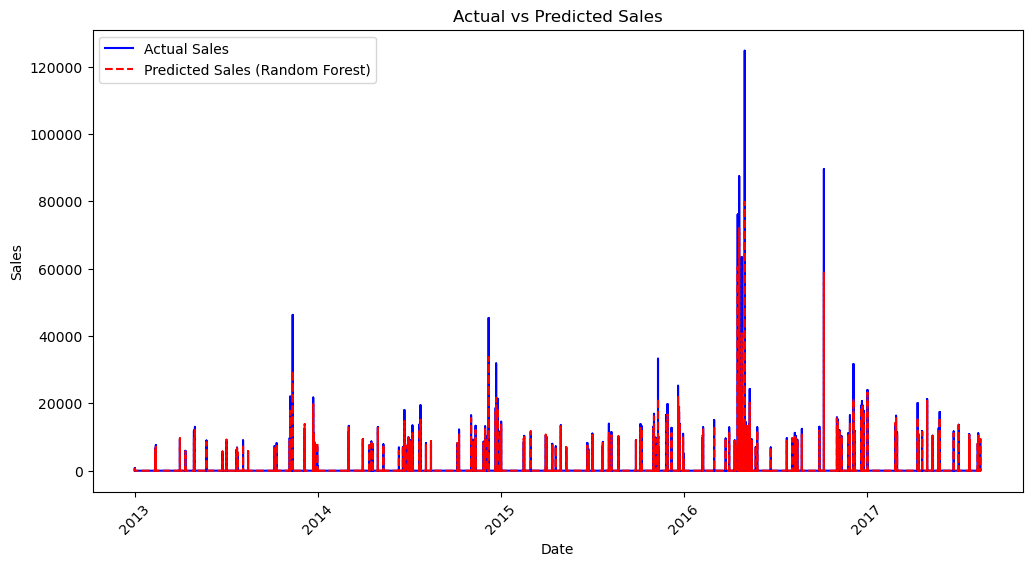

In [52]:
## Visualization: Actual vs Predicted Sales of best model.
plt.figure(figsize=(12, 6))
plt.plot(train['date'], train['sales'], label='Actual Sales', color='blue')
plt.plot(train['date'], train['rf_forecast'], label='Predicted Sales (Random Forest)', color='red', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Insights: Actual and predicted sales are almost the same for most prediction, somewhere difference is observed.

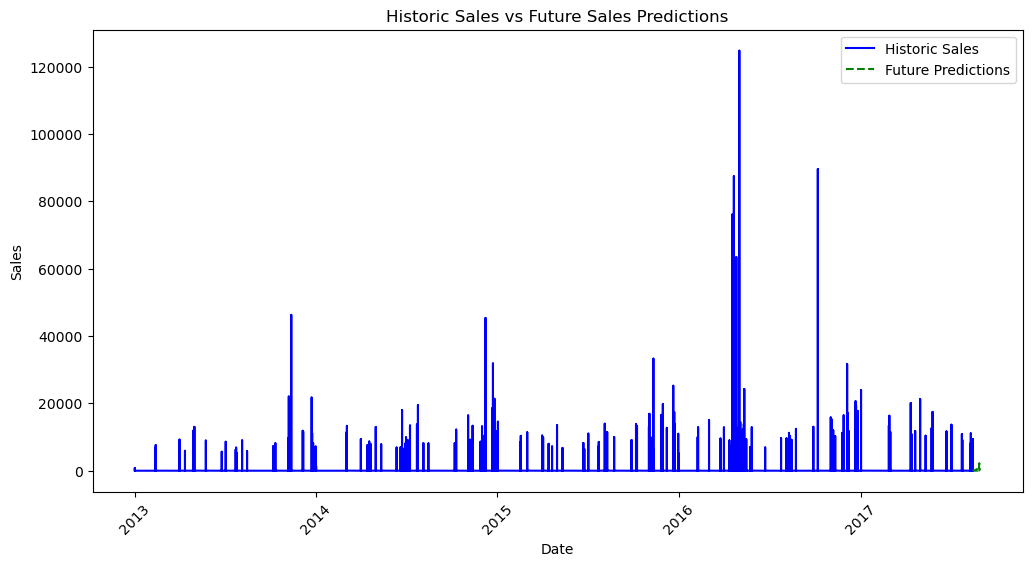

In [53]:
## Visualization: Historic Sales vs Future Predictions
plt.figure(figsize=(12, 6))
plt.plot(train['date'], train['sales'], label='Historic Sales', color='blue')
plt.plot(future_df['date'], future_df['sales_forecast'], label='Future Predictions', color='green', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Historic Sales vs Future Sales Predictions')
plt.legend()
plt.xticks(rotation=45)
plt.show()

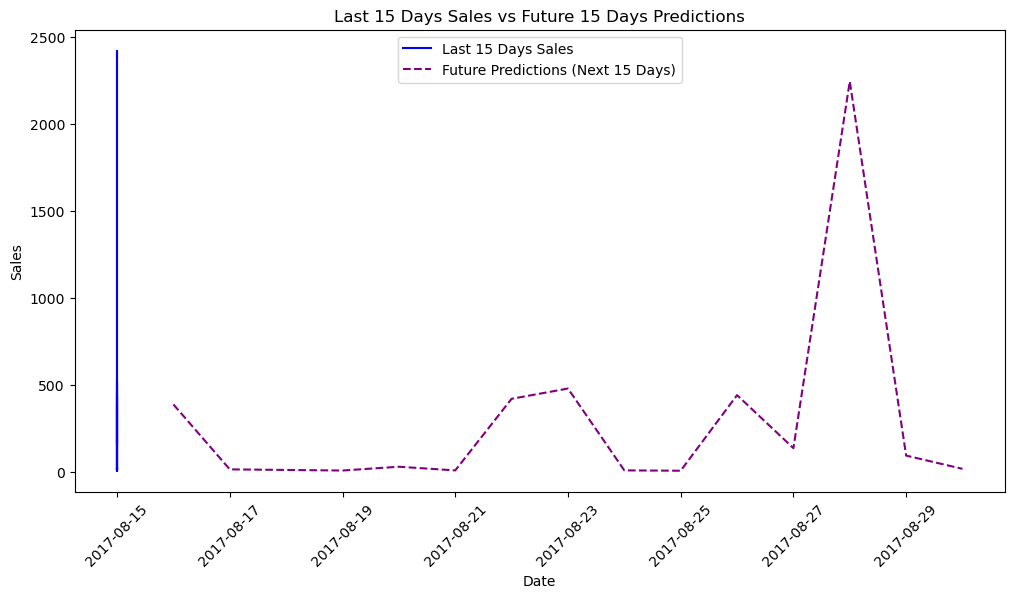

In [54]:
## Visualization: Historic Sales (Last 15 Days) vs Future Predictions (Next 15 Days)
plt.figure(figsize=(12, 6))
last_15_days = train[['date', 'sales']].tail(15)
plt.plot(last_15_days['date'], last_15_days['sales'], label='Last 15 Days Sales', color='blue')
plt.plot(future_df['date'], future_df['sales_forecast'], label='Future Predictions (Next 15 Days)', color='purple', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Last 15 Days Sales vs Future 15 Days Predictions')
plt.legend()
plt.xticks(rotation=45)
plt.show()

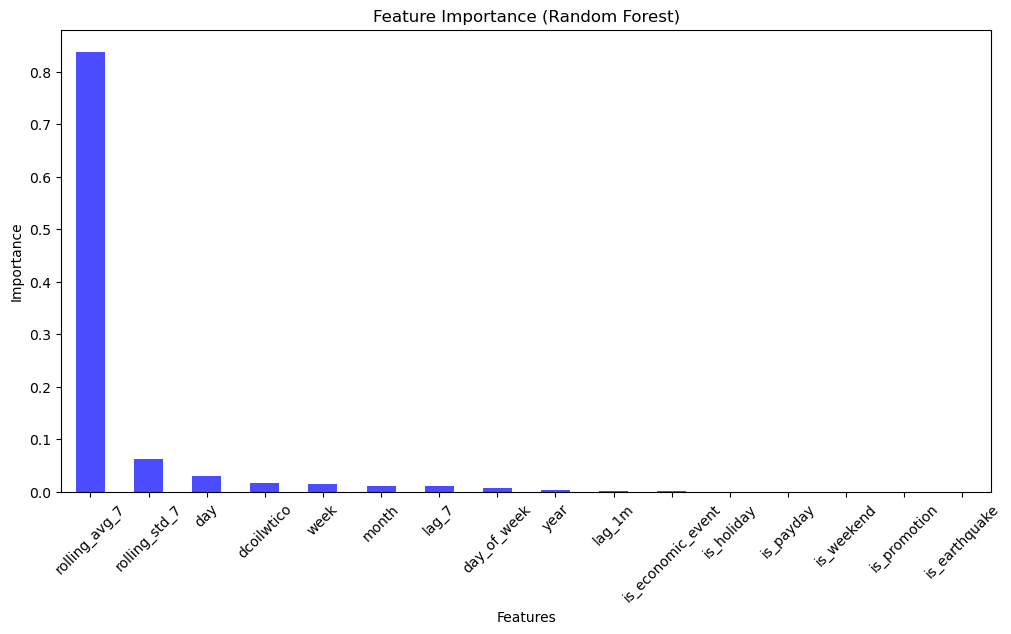

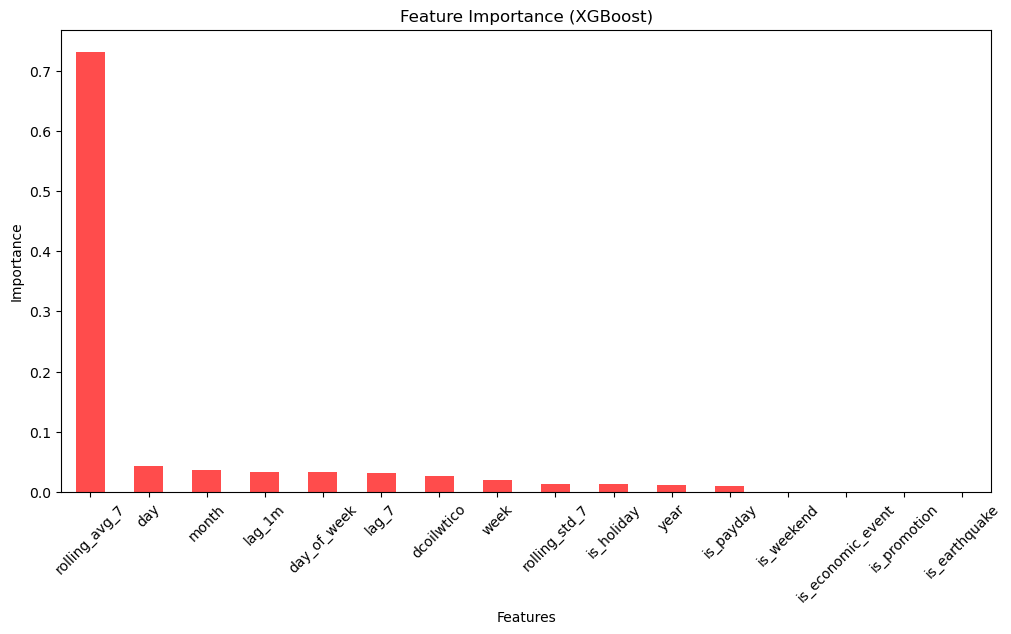

In [55]:
## Visualization: Feature Importance for Random Forest and XGBoost
plt.figure(figsize=(12, 6))
rf_importances = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False)
rf_importances.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
xgb_importances = pd.Series(xgb_model.feature_importances_, index=features).sort_values(ascending=False)
xgb_importances.plot(kind='bar', color='red', alpha=0.7)
plt.title('Feature Importance (XGBoost)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

##  4. Interpretation and Business Insights

In [56]:
# Summarize which model performed best and why.

best_model = results_df.sort_values(by='RMSE').iloc[0]['Model']
print(f"\nBest Performing Model: {best_model}")

    # Why?- The model have the lowest RMSE and MAPE and the highest R² score, meaning it makes the most accurate predictions.


Best Performing Model: Random Forest


In [57]:
# Business Strategy Recommendations

print("\nBusiness Strategies to Improve Sales Forecasting:\n")
print("1. Inventory Optimization: Adjust stock levels based on predicted demand during holidays and promotions to prevent overstocking or stockouts.")
print("2. **Targeted Promotions**: Focus promotional efforts on periods with historically high sales to maximize revenue.")
print("3. Price Adjustments: Consider dynamic pricing strategies based on external economic conditions, such as oil price fluctuations.")
print("4. Regional Adaptation: Use localized insights to optimize inventory and marketing strategies for specific store locations.")


Business Strategies to Improve Sales Forecasting:

1. Inventory Optimization: Adjust stock levels based on predicted demand during holidays and promotions to prevent overstocking or stockouts.
2. **Targeted Promotions**: Focus promotional efforts on periods with historically high sales to maximize revenue.
3. Price Adjustments: Consider dynamic pricing strategies based on external economic conditions, such as oil price fluctuations.
4. Regional Adaptation: Use localized insights to optimize inventory and marketing strategies for specific store locations.
